# Explore here

In [62]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
import numpy as np
from pickle import dump

In [4]:
#CARGAR CODIGO 
df= pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv")
df.head()


,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


In [5]:
df.shape

(366, 2)

In [6]:
#EXAMINAR CODIGO
df.isna().sum()

date     0
sales    0
dtype: int64

In [7]:
#EIMINAR INDICE NUMERICO Y PONER LA FECHA PARA PODER ANALIZAR TENDENCIA A POSTERIORI
df["date"]= pd.to_datetime(df.date)

In [8]:
df= df.set_index("date")

In [9]:
df.head()

,sales
date,
2022-09-03 17:10:08.079328,55.292157
2022-09-04 17:10:08.079328,53.803211
2022-09-05 17:10:08.079328,58.141693
2022-09-06 17:10:08.079328,64.530899
2022-09-07 17:10:08.079328,66.013633


In [10]:
#SELECCIONO SOLO SALES PORQUE YA TENGO DATES COMO INDICE
dft= df["sales"]
dft.head()

date
2022-09-03 17:10:08.079328    55.292157
2022-09-04 17:10:08.079328    53.803211
2022-09-05 17:10:08.079328    58.141693
2022-09-06 17:10:08.079328    64.530899
2022-09-07 17:10:08.079328    66.013633
Name: sales, dtype: float64

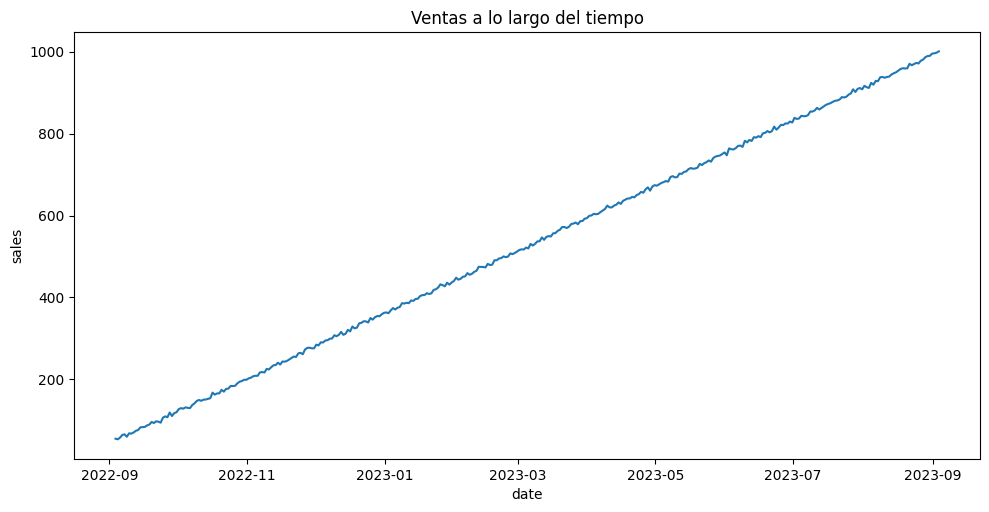

In [11]:
#GRAFICAR 
fig, axis = plt.subplots(figsize = (10, 5))
sns.lineplot(data = dft)
plt.tight_layout()
plt.title("Ventas a lo largo del tiempo")
plt.show()

En la gráfica se puede observar una tendencia a aumentar las ventas con respecto el tiempo

In [12]:
#DESCOMPOSICIÓN DE SERIES TEMPORALES 
dftest= adfuller(dft, autolag= "AIC")
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
print(dfoutput)

Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
dtype: float64


In [13]:
p_value = dftest[1]
print(f"El valor estadistco de p es: {p_value}")

El valor estadistco de p es: 0.9861899815311063


Como el valor de p es mayor de 0.05 por lo que la serie no es estacionaria 

In [14]:
tensor = pd.Series(dft.index).diff()
print(tensor)

0        NaT
1     1 days
2     1 days
3     1 days
4     1 days
       ...  
361   1 days
362   1 days
363   1 days
364   1 days
365   1 days
Name: date, Length: 366, dtype: timedelta64[ns]


El tensor es diario (1 día)

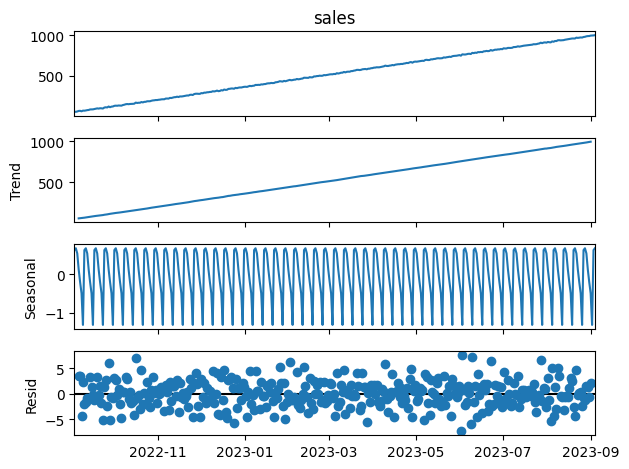

In [15]:
#GRAFICAR LA DESCOMPOSICIÓN 
decomposicion = seasonal_decompose(dft, model='additive')
decomposicion.plot()
plt.show()

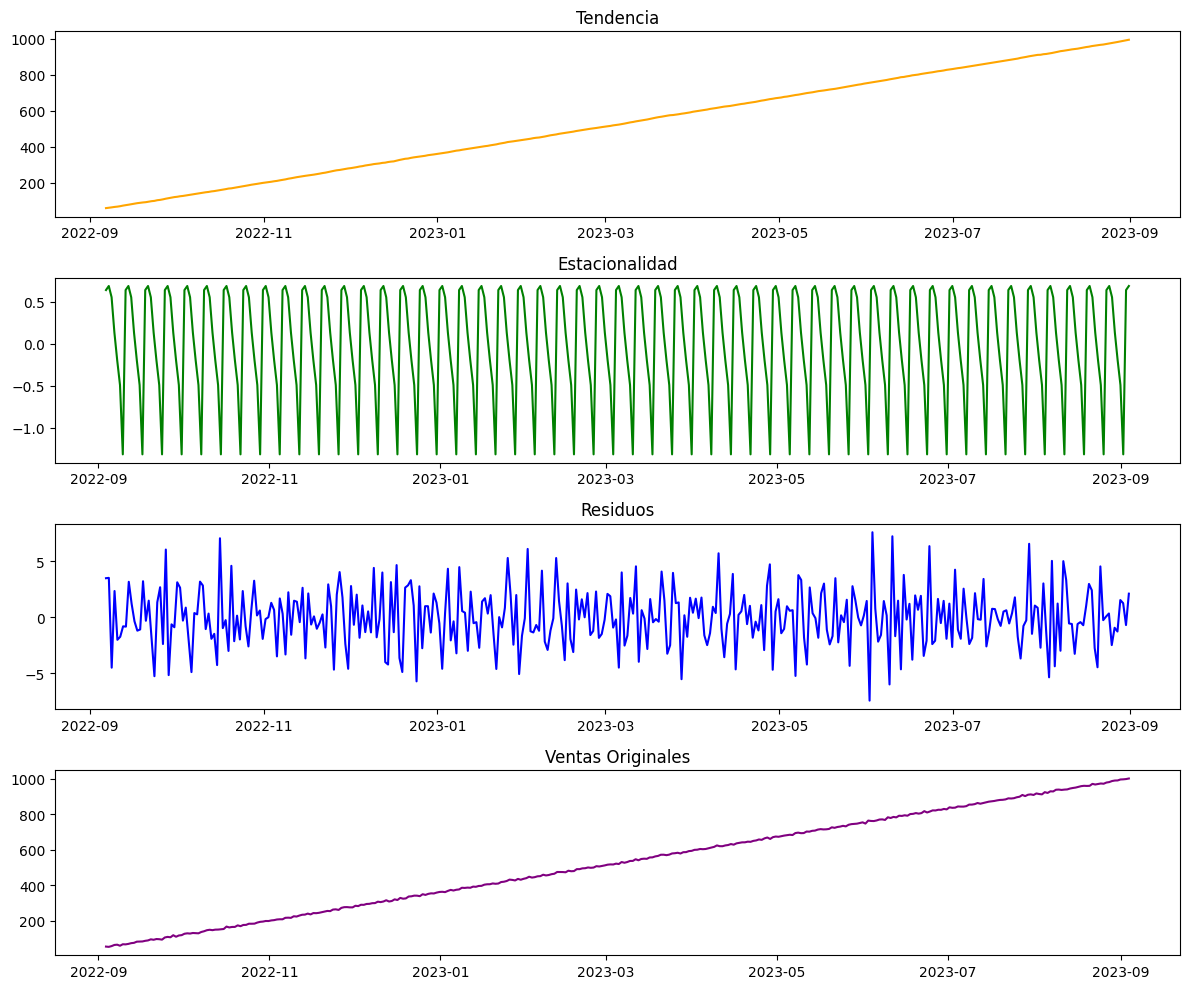

In [16]:
plt.figure(figsize=(12, 10))

plt.subplot(4, 1, 1)
plt.plot(decomposicion.trend, label='Tendencia', color='orange')
plt.title('Tendencia')

plt.subplot(4, 1, 2)
plt.plot(decomposicion.seasonal, label='Estacionalidad', color='green')
plt.title('Estacionalidad')

plt.subplot(4, 1, 3)
plt.plot(decomposicion.resid, label='Residuos', color='blue')
plt.title('Residuos')

plt.subplot(4, 1, 4)
plt.plot(dft, label='Ventas Originales', color='purple')
plt.title('Ventas Originales')

plt.tight_layout()
plt.show()

La tendencia es positiva durante todo el análisis
Pese a que el valor de p no marca estacionalidad, la gráfica parece ser estacional, ya que parece ser un gráfico periódico, probablemente el valor de p sea por los residuos, que parecen seguir un patrón asimétrico, raro de datos estacionarios pero común en datos de negocios reales.
Es una serie con ruido relativo, ya que los residuos no siguen un patrón pero en el último gráfico, parece que los residuos no afectan a la tendencia así que la variabilidad no es marcada.


In [17]:
#ENTRENAR MODELO ARIMA 
#modelo = auto_arima(dft, seasonal=False, trace=True)
#AUTOARIMA ME DIO PROBLEMAS CON NUMPY: DESINSTALE E INSTALE LAS ED ADECUADAS, CREE UN ESPACIO VIRTUAL, DESACTIVE NUMPY Y NO FUNCIONÓ, ASI QUE AUNQUE NO SEA TAN RÁPIDA DE APLICAR ME MUDO A STATSMODELS

In [42]:
#DIVIDIR EN TRAIN Y TEST 
train_size = int(len(dft) * 0.8)
train, test = dft[:train_size], dft[train_size:]

In [46]:
#IMPLANTACIÓN MODELO ARIMA 
modelo = ARIMA((train), order=(1, 1, 1))
modelo_fit = modelo.fit()

print(modelo_fit.summary())

/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                  292
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -838.546
Date:                Sun, 06 Oct 2024   AIC                           1683.092
Time:                        21:04:04   BIC                           1694.112
Sample:                    09-03-2022   HQIC                          1687.507
                         - 06-21-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.001   1070.826      0.000       0.998       1.002
ma.L1         -0.9996      0.749     -1.334      0.182      -2.468       0.469
sigma2        18.3660     13.863      1.325      0.1

In [47]:
#PREDICCIONES SEGÚN METODO ARIMA 
predicciones = modelo_fit.forecast(steps=len(test))
predicciones.head

<bound method NDFrame.head of 2023-06-22 17:10:08.079328    808.509175
2023-06-23 17:10:08.079328    811.064170
2023-06-24 17:10:08.079328    813.619165
2023-06-25 17:10:08.079328    816.174159
2023-06-26 17:10:08.079328    818.729152
                                 ...    
2023-08-30 17:10:08.079328    984.802193
2023-08-31 17:10:08.079328    987.357140
2023-09-01 17:10:08.079328    989.912086
2023-09-02 17:10:08.079328    992.467031
2023-09-03 17:10:08.079328    995.021975
Freq: D, Name: predicted_mean, Length: 74, dtype: float64>

In [51]:
len(test)

74

In [49]:
#COMPROBAR RDTO
rmse = np.sqrt(mean_squared_error(test, predicciones))
print('RMSE:', rmse)

RMSE: 4.061048793912974


Un RMSE de 4 con ventas que empiezan en valores de 50 y acaban en valores de 1000 es un buen error medio, indica que el modelo esta bien ajustado 

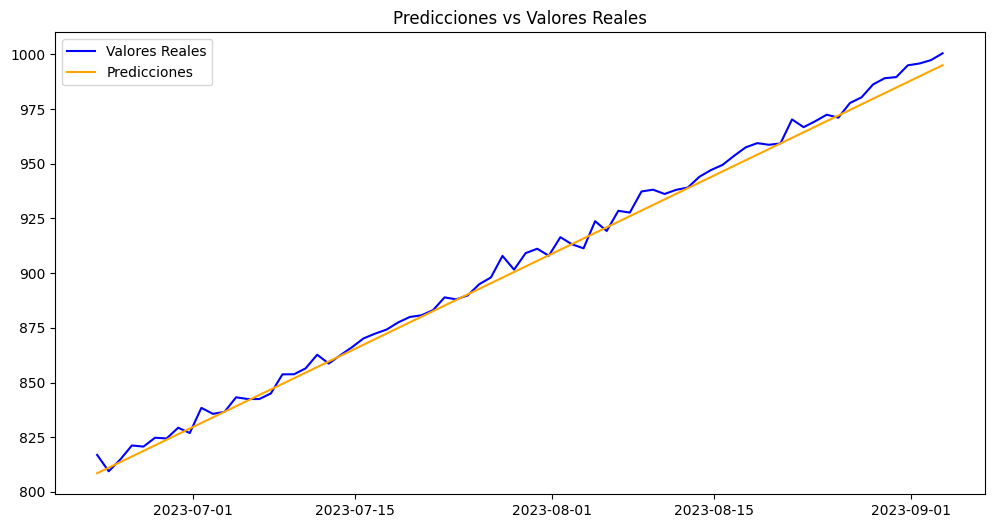

In [50]:
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Valores Reales', color='blue')
plt.plot(test.index, predicciones, label='Predicciones', color='orange')
plt.title('Predicciones vs Valores Reales')
plt.legend()
plt.show()

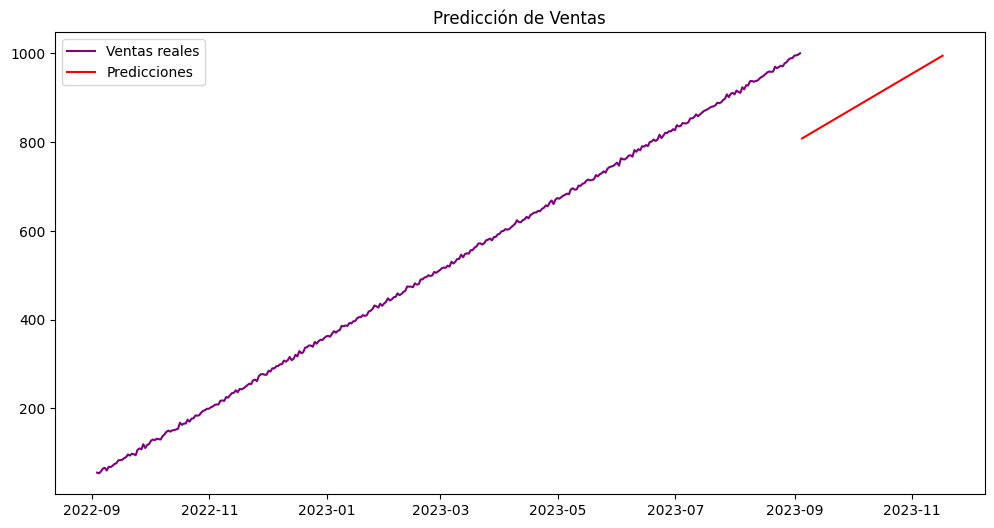

In [61]:
#PREDICCIÓN VENTAS 
plt.figure(figsize=(12, 6))
plt.plot(dft.index, dft, label='Ventas reales', color='purple')
plt.plot(predicciones_index, predicciones, label='Predicciones', color='red')
plt.title('Predicción de Ventas')
plt.legend()
plt.show()

La predicción conserva la tendencia natural, (la pendiente es la misma) aunque no se porque esta desplazada, creando dos lineas paralelas 

In [63]:
dump(modelo_fit, open("../models/modelo_arima.sav", "wb"))
dump(predicciones, open("../models/predicciones_arima.sav", "wb"))